In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('archives\dados_bacen.csv', index_col=0, parse_dates=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Neon Live\AppData\Local\Temp\ipykernel_8548\1040498732.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('archives\dados_bacen.csv', index_col=0, parse_dates=True)


In [4]:
df

,Dólar (PTAX),Selic Diária (%),Selic Anual (%),IPCA Anual (%),Fed Rate (%)
2000-01-01,1.8003,0.069186,0.190399,0.0885,0.0545
2000-01-02,1.8003,0.069186,0.190399,0.0885,0.0545
2000-01-03,1.8003,0.069186,0.190399,0.0885,0.0545
2000-01-04,1.8329,0.069186,0.190399,0.0885,0.0545
2000-01-05,1.8536,0.069220,0.190501,0.0885,0.0545
...,...,...,...,...,...
2025-12-28,5.5407,0.055131,0.149000,0.0426,0.0372
2025-12-29,5.5733,0.055131,0.149000,0.0426,0.0372
2025-12-30,5.5018,0.055131,0.149000,0.0426,0.0372
2025-12-31,5.5018,0.055131,0.149000,0.0426,0.0372


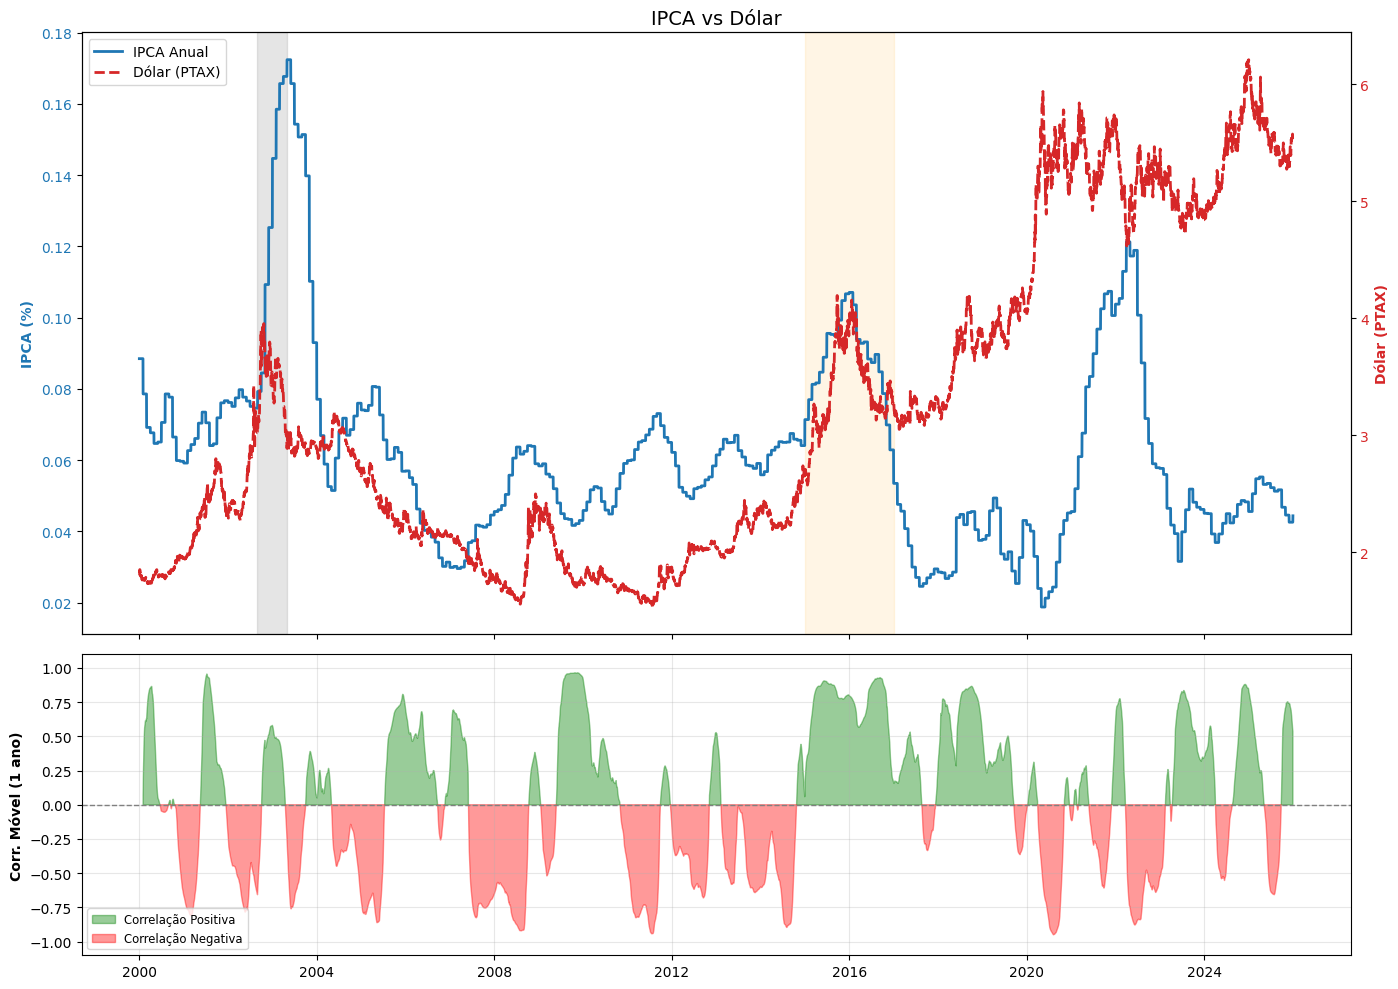

In [6]:
# --- 1. CÁLCULO DA CORRELAÇÃO (IPCA vs SELIC) ---
# Como o IPCA é um dado mensal (mesmo em tabelas diárias), 
# uma janela de 180 a 252 dias capta bem o ciclo de um ano.
df['corr_ipca_dolar'] = df['IPCA Anual (%)'].rolling(window=252, min_periods=30).corr(df['Dólar (PTAX)'])

# 4. Visualização com Subplots
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, 
                               gridspec_kw={'height_ratios': [2, 1]})

# --- GRÁFICO SUPERIOR: IPCA VS SELIC ---
ax1.set_ylabel('IPCA (%)', color='tab:blue', fontweight='bold')
lns1 = ax1.plot(df.index, df['IPCA Anual (%)'], color='tab:blue', lw=2, label='IPCA Anual')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Dólar (PTAX)', color='tab:red', fontweight='bold')
lns2 = ax2.plot(df.index, df['Dólar (PTAX)'], color='tab:red', lw=2, label='Dólar (PTAX)', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')

# --- GRÁFICO INFERIOR: CORRELAÇÃO MÓVEL CORRIGIDA ---
ax3.set_ylabel('Corr. Móvel (1 ano)', fontweight='bold')

# USANDO A COLUNA DE CORRELAÇÃO AQUI:
ax3.fill_between(df.index, 0, df['corr_ipca_dolar'], 
                 where=(df['corr_ipca_dolar'] >= 0), 
                 color='green', alpha=0.4, label='Correlação Positiva')
ax3.fill_between(df.index, 0, df['corr_ipca_dolar'], 
                 where=(df['corr_ipca_dolar'] < 0), 
                 color='red', alpha=0.4, label='Correlação Negativa')

ax3.axhline(0, color='gray', lw=1, ls='--')
ax3.set_ylim(-1.1, 1.1)
ax3.grid(alpha=0.3)

# --- DESTAQUES E LEGENDAS ---
ax1.axvspan('2002-08-27', '2003-04-30', color='gray', alpha=0.2, label='Choque 2001')
ax1.axvspan('2015-01-01', '2016-12-31', color='orange', alpha=0.1, label='Crise Fiscal/Inflacionária')

# Unindo todas as legendas do gráfico superior
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left', frameon=True)
ax3.legend(loc='lower left', fontsize='small')

ax1.set_title('IPCA vs Dólar', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Verifica a correlação do IPCA de hoje com o Dólar de 2 meses atrás
print(df['IPCA Anual (%)'].corr(df['Dólar (PTAX)'].shift(2)))

0.0020114150406786444
